### 気象データの確認

In [45]:
import subprocess
from subprocess import PIPE

def shell(command):
    print(command)
    proc = subprocess.run(command, shell=True, stdout=PIPE, stderr=PIPE, text=True)
    return proc.stdout, proc.stderr
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### データの切り出し

In [67]:
####

date = {'year':2023, 'month':6, 'day':6}

names = ["Weather Humidity", 
         "Weather Temperature",
         "Weather Wind Velocity(AVG)",
         "Weather Wind Velocity(Max.)",
         "Weather Accumulated RainFall",
         "Weather Atmospheric Pressure"]

type = 'L' # 'E' 'L' 'S'

####

if type == 'E':
    _type = 'V'
else:
    _type = type
inputFilePath = f"/stars/{date['year']}/TSC{_type}-{date['year']}{date['month']:02}{date['day']:02}-17.pkt"
extractor = "dump-tsc-log -a -z"

extractNames = f''
for name in names:
    extractNames += f'-e \"{name}\" '

(_, outputText) = shell(f'{extractor} {extractNames} {inputFilePath}')
outputFilePath = outputText.split('\n')[-2][11:]
print(f'{outputFilePath} generated.')

dump-tsc-log -a -z -e "Weather Humidity" -e "Weather Temperature" -e "Weather Wind Velocity(AVG)" -e "Weather Wind Velocity(Max.)" -e "Weather Accumulated RainFall" -e "Weather Atmospheric Pressure"  /stars/2023/TSCL-20230606-17.pkt
./TSCL-20230606-17.pkt-L-000C.log generated.


2023-06-06 16:59:54.8 Weather Humidity : 28.5
2023-06-06 17:00:00.8 Weather Humidity : 28.4
2023-06-06 17:06:00.8 Weather Humidity : 28.5
2023-06-06 17:06:06.8 Weather Humidity : 28.9
2023-06-06 17:06:12.8 Weather Humidity : 28.9
2023-06-06 17:06:18.8 Weather Humidity : 28.7
2023-06-06 17:06:24.8 Weather Humidity : 28.5
2023-06-06 17:06:30.8 Weather Humidity : 28.5
2023-06-07 07:27:13.5 Weather Humidity : 3.0
2023-06-07 07:50:19.5 Weather Temperature : 13.8
2023-06-07 07:50:25.5 Weather Temperature : 13.8
2023-06-07 07:50:31.5 Weather Temperature : 13.8
2023-06-07 05:16:25.4 Weather Wind Velocity(Max.) : 6.3
2023-06-07 05:17:55.4 Weather Wind Velocity(Max.) : 6.4
2023-06-07 05:18:01.4 Weather Wind Velocity(Max.) : 6.3
2023-06-07 05:18:07.4 Weather Wind Velocity(Max.) : 6.4
2023-06-07 06:24:37.4 Weather Wind Velocity(Max.) : 7.0
2023-06-07 06:24:43.4 Weather Wind Velocity(Max.) : 6.5


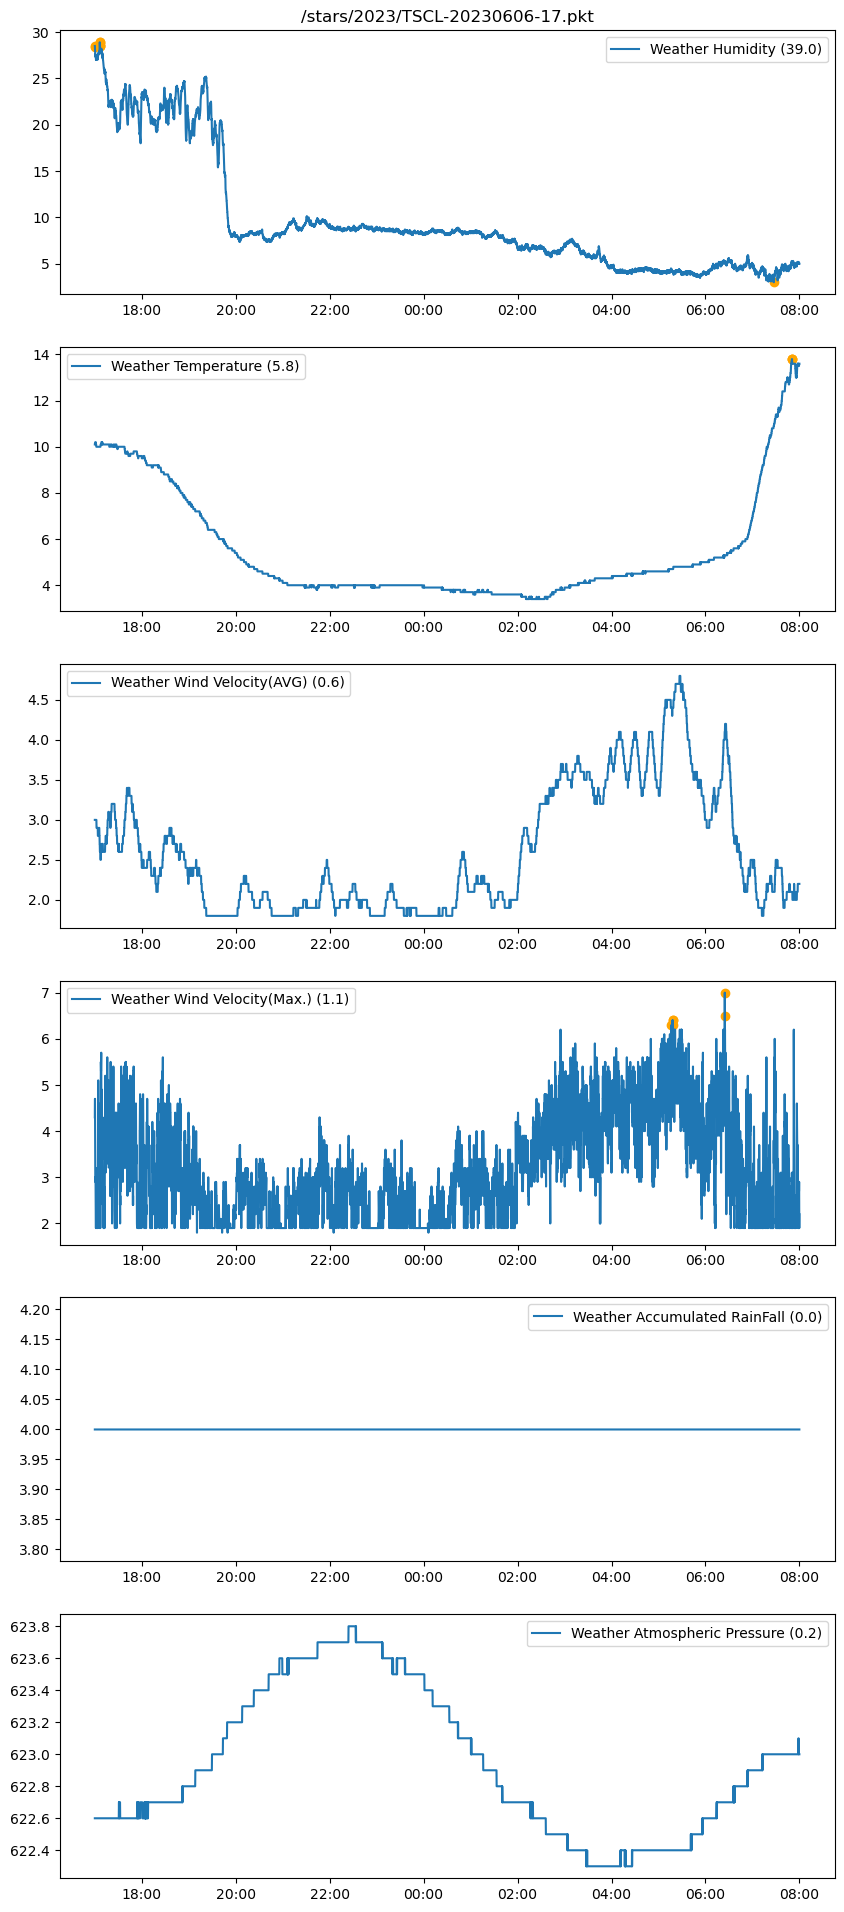

In [68]:
df = pd.read_table(outputFilePath)
data = df.values
df['datetime']= pd.to_datetime(df['#rxdate'] + ' ' + df['rxtime(HST)'])

numberOfPlot = len(names)
fig, axes = plt.subplots(numberOfPlot, 1, figsize=(10, 4*numberOfPlot))
plt.subplot(numberOfPlot, 1, 1)  # to set the following title only at the top
plt.title(inputFilePath)

for i, name in zip(range(3, 3+len(names)), names):
    ts = pd.Series(data[:,i], index=df['datetime'])
    l = np.percentile(data[:,i], 0.01)
    h = np.percentile(data[:,i], 99.9)
    outlier = ts[(ts > h) | (ts < l)]
    plotId = i - 3
    axes[plotId].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[plotId].plot(df['datetime'], data[:,i], label=f'{name} ({np.var(data[:,i]):.1f})')
    axes[plotId].scatter(outlier.index, outlier, color='orange')
    axes[plotId].legend()
    for t in outlier.index:
        print(f'{t.strftime("%Y-%m-%d %H:%M:%S.%f")[:21]} {name} : {ts[t]}')
            
plt.show()